# kNN for classification problems

In [1]:
from copy import deepcopy
from random import randint
import numpy as np
from matplotlib import pyplot
from sklearn.datasets.samples_generator import make_blobs
import operator
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Euclidean Distance

In [2]:
def dist(a, b):
    '''
    Euclidean Distance
    '''
    return np.linalg.norm(a - b)

In [3]:
def dist_2d(a,b):
    '''
    Euclidean Distance
    '''
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i] - b[i])**2
    dist = sqrt(squared_distances)
    return dist

In [4]:
def get_neighbors(data, instance, k):
    '''
    Function that returns k neighbors using Euclidean Distance 
    
    '''
    distances = []
    length = len(instance)-1
    
    for n in range(len(data)):
        dist_inst_data = dist(instance, data[n])
        distances.append((data[n], dist_inst_data))
    
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for m in range(k):
        neighbors.append(distances[m][0])
    return neighbors

In [5]:
def get_class_labels(neighbors):
    '''
    Function that sets moajority vote as the prediction
    '''
    votes ={}
    for n in range(len(neighbors)):
        response = neighbors[n][-1]
        if response in votes:
            votes[response] += 1
        else:
            votes[response] = 1
    sorted_votes = sorted(votes.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]

In [6]:
def get_accuracy(test_set, predictions):
    '''
    Function that calculates accuracy using labels stored in the last column
    '''
    ok = 0
    test_len = len(test_set)
    print("data test examples' size = " + str(test_len))
    for i in range(test_len):
        print("true label = " + str(int(test_set[i][-1])))
        print("predicted label = " + str(int(predictions[i])))
        if i < test_len:
            print(" --- next example --- ")
        if test_set[i][-1] == predictions[i]:
            ok += 1
    return ( ok /float(test_len)) * 100.0

Let's use iris dataset

In [7]:
iris = load_iris()

In [8]:
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [9]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.50, random_state=111)

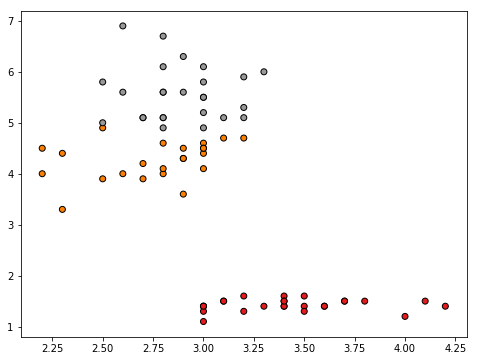

In [10]:
pyplot.figure(2, figsize=(8, 6))
pyplot.clf()
# Plot the training points
pyplot.scatter(x_train[:, 1], x_train[:, 2], c=y_train, cmap=pyplot.cm.Set1, edgecolor='k')

In [11]:
x_train.shape

(75, 4)

In [12]:
y_train.shape

(75,)

In [13]:
data_train = np.column_stack( [x_train, y_train] ) # all data together, last column = labels
data_train2 = deepcopy(x_train) # I will use this for regression so I don't need labels 
                                #                    (will predict one of the features)

In [14]:
data_test = np.column_stack( [x_test, y_test] )
data_test2 = deepcopy(x_test)

In [15]:
predictions = []

In [16]:
k = 10

In [17]:
for i in range(len(data_test)):
    neighbors = get_neighbors(data_train, data_test[i], k)
    result = get_class_labels(neighbors)
    predictions.append(result)

In [18]:
accuracy = get_accuracy(data_test, predictions)

data test examples' size = 75
true label = 0
predicted label = 0
 --- next example --- 
true label = 0
predicted label = 0
 --- next example --- 
true label = 2
predicted label = 2
 --- next example --- 
true label = 2
predicted label = 2
 --- next example --- 
true label = 1
predicted label = 1
 --- next example --- 
true label = 0
predicted label = 0
 --- next example --- 
true label = 0
predicted label = 0
 --- next example --- 
true label = 2
predicted label = 2
 --- next example --- 
true label = 2
predicted label = 2
 --- next example --- 
true label = 1
predicted label = 1
 --- next example --- 
true label = 2
predicted label = 2
 --- next example --- 
true label = 0
predicted label = 0
 --- next example --- 
true label = 2
predicted label = 2
 --- next example --- 
true label = 2
predicted label = 2
 --- next example --- 
true label = 2
predicted label = 2
 --- next example --- 
true label = 0
predicted label = 0
 --- next example --- 
true label = 2
predicted label = 2
 --- ne

In [19]:
print(accuracy)

98.66666666666667


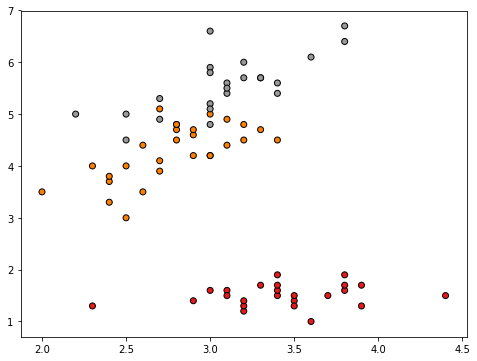

In [20]:
pyplot.figure(2, figsize=(8, 6))
pyplot.clf()
# Plot the training points
pyplot.scatter(x_test[:, 1], x_test[:, 2], c=y_test, cmap=pyplot.cm.Set1, edgecolor='k')

# True labels

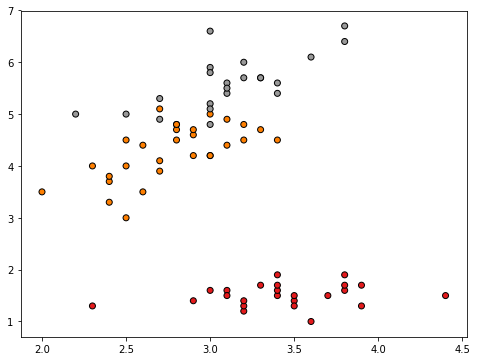

In [21]:
pyplot.figure(2, figsize=(8, 6))
pyplot.clf()
# Plot the training points
pyplot.scatter(x_test[:, 1], x_test[:, 2], c=predictions, cmap=pyplot.cm.Set1, edgecolor='k')

# Predicted labels

# kNN for regression

In [22]:
def make_regression(test_set, train_set, k):
    '''
    For regression setting, we just take the average of the output of the K closet training data points
    
    First of all we check which feature is missing and then we will use k neighbors to fill 
    this information
    '''
    
    predicted_values = []
    
    # for each of the examples in test set we find k nearest neighbors and calculate missing value    
    for n in range(len(test_set)):
        print(test_set[n])
        missing = int(np.argwhere(np.isnan(test_set[n]))) # index of a missing feature  
        print(missing)
        av_res = 0
        neighbors = get_neighbors(train_set, test_set[n], k) # k neighbors
        
        print(neighbors)
        
        for m in neighbors:
            av_res += m[missing]
            print(m[missing])
        
        predicted_values.append(av_res/k)
        
    return predicted_values

In [23]:
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [24]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [25]:
test1 = np.array([ [5. , 3.4, np.nan , 0.2] ])

In [26]:
predicted_x3_for_test1 = make_regression(test1, x_train, k)

[5.  3.4 nan 0.2]
2
[array([6.8, 3.2, 5.9, 2.3]), array([6.6, 3. , 4.4, 1.4]), array([6. , 2.2, 4. , 1. ]), array([6.4, 2.8, 5.6, 2.1]), array([6.1, 2.8, 4. , 1.3]), array([6.5, 3. , 5.8, 2.2]), array([5. , 3.5, 1.6, 0.6]), array([7.7, 3. , 6.1, 2.3]), array([5.8, 2.7, 5.1, 1.9]), array([5.2, 4.1, 1.5, 0.1])]
5.9
4.4
4.0
5.6
4.0
5.8
1.6
6.1
5.1
1.5


In [27]:
print(predicted_x3_for_test1)

[4.4]


In [28]:
#
# Let's check it on a larger number of examples 

In [29]:
test2 = np.array([ [5. , 3.4, np.nan , 0.2], 
                   [5. , 3.4, 4.2 , np.nan],
                   [5.1, 3.2, np.nan, 0.4],
                   [np.nan, 3.2, 1.7, 0.6]
                 ])

So we have four missing values that we want to predict using kNN, let's see how it works

In [30]:
predicted_for_test2 = make_regression(test2, x_train, k)

[5.  3.4 nan 0.2]
2
[array([6.8, 3.2, 5.9, 2.3]), array([6.6, 3. , 4.4, 1.4]), array([6. , 2.2, 4. , 1. ]), array([6.4, 2.8, 5.6, 2.1]), array([6.1, 2.8, 4. , 1.3]), array([6.5, 3. , 5.8, 2.2]), array([5. , 3.5, 1.6, 0.6]), array([7.7, 3. , 6.1, 2.3]), array([5.8, 2.7, 5.1, 1.9]), array([5.2, 4.1, 1.5, 0.1])]
5.9
4.4
4.0
5.6
4.0
5.8
1.6
6.1
5.1
1.5
[5.  3.4 4.2 nan]
3
[array([6.8, 3.2, 5.9, 2.3]), array([6.6, 3. , 4.4, 1.4]), array([6. , 2.2, 4. , 1. ]), array([6.4, 2.8, 5.6, 2.1]), array([6.1, 2.8, 4. , 1.3]), array([6.5, 3. , 5.8, 2.2]), array([5. , 3.5, 1.6, 0.6]), array([7.7, 3. , 6.1, 2.3]), array([5.8, 2.7, 5.1, 1.9]), array([5.2, 4.1, 1.5, 0.1])]
2.3
1.4
1.0
2.1
1.3
2.2
0.6
2.3
1.9
0.1
[5.1 3.2 nan 0.4]
2
[array([6.8, 3.2, 5.9, 2.3]), array([6.6, 3. , 4.4, 1.4]), array([6. , 2.2, 4. , 1. ]), array([6.4, 2.8, 5.6, 2.1]), array([6.1, 2.8, 4. , 1.3]), array([6.5, 3. , 5.8, 2.2]), array([5. , 3.5, 1.6, 0.6]), array([7.7, 3. , 6.1, 2.3]), array([5.8, 2.7, 5.1, 1.9]), array([5.2, 4.1,

In [31]:
print(predicted_for_test2)

[4.4, 1.52, 4.4, 6.21]
